In [7]:
import cv2 as cv
import random
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from skimage.feature import hog
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from scipy.spatial.distance import euclidean

In [2]:
def load_data():
    X = np.load("/kaggle/input/make-pairs-no-split/X.npy")
    print(X.shape)
    y = np.load("/kaggle/input/make-pairs-no-split/y.npy")
    print(y.shape)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = None)
    print(X_train.shape)
    print(y_train.shape)
    print(X_test.shape)
    print(y_test.shape)

    del X
    del y

    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = load_data()

(30360, 2, 150, 200)
(30360,)
(21252, 2, 150, 200)
(21252,)
(9108, 2, 150, 200)
(9108,)


## SVM

In [61]:
train_distances_arr = []
kp_dict_train = {}

test_distances_arr = []
kp_dict_test = {}

orb = cv.ORB_create()

In [64]:
for i, pairs in enumerate(X_train[:]):
    kp1, des1 = orb.detectAndCompute(cv2.normalize(pairs[0], None, 0, 255, cv2.NORM_MINMAX).astype('uint8'), None)
    kp2, des2 = orb.detectAndCompute(cv2.normalize(pairs[1], None, 0, 255, cv2.NORM_MINMAX).astype('uint8'), None)
    kp_dict_train[i] = (kp1[0:90], kp2[0:90])
    distance = euclidean(des1[:90, :].flatten(), des2[:90, :].flatten())
    train_distances_arr.append(distance)
    
print("Train distances computed")

Train distances computed


In [65]:
distances_train = np.array(train_distances_arr)
print(distances_train.shape)

(21252,)


In [62]:
for i, pairs in enumerate(X_test[:]):
    kp1, des1 = orb.detectAndCompute(cv2.normalize(pairs[0], None, 0, 255, cv2.NORM_MINMAX).astype('uint8'), None)
    kp2, des2 = orb.detectAndCompute(cv2.normalize(pairs[1], None, 0, 255, cv2.NORM_MINMAX).astype('uint8'), None)
    kp_dict_test[i] = (kp1[0:90], kp2[0:90])
    distance = euclidean(des1[:90, :].flatten(), des2[:90, :].flatten())
    test_distances_arr.append(distance)
    
print("Test distances computed")

Test distances computed


In [63]:
distances_test = np.array(test_distances_arr)
print(distances_test.shape)

(9108,)


In [83]:
def visualize_kp(pairs, labels, kp_dict, to_show=6, num_col=3, predictions=None, test=False):
    
    num_row = to_show // num_col if to_show // num_col != 0 else 1

    to_show = num_row * num_col

    # Plot the images
    fig, axes = plt.subplots(num_row, num_col, figsize=(10, 10))
    
    for i in range(to_show):
        # If the number of rows is 1, the axes array is one-dimensional
        if to_show == 1:
            ax = axes
        else:
            if num_row == 1:
                ax = axes[i % num_col]
            else:
                ax = axes[i // num_col, i % num_col]
        
        n = random.randint(0, pairs.shape[0])
        print(f"Index to show: {n}")
        img1 = cv.drawKeypoints(np.uint8(pairs[n][0]), kp_dict[n][0], None)
        img2 = cv.drawKeypoints(np.uint8(pairs[n][1]), kp_dict[n][0], None)
        ax.imshow(np.concatenate([img1, img2], axis=1), cmap="gray")
        ax.set_axis_off()
        if test:
            ax.set_title("True: {} | Pred: {:.5f}".format(labels[n], predictions[n][0]))
        else:
            ax.set_title("Label: {}".format(labels[n]))
    if test:
        plt.tight_layout(rect=(0, 0, 1.9, 1.9), w_pad=0.0)
    else:
        plt.tight_layout(rect=(0, 0, 1.5, 1.5))
    plt.show()


Index to show: 1804


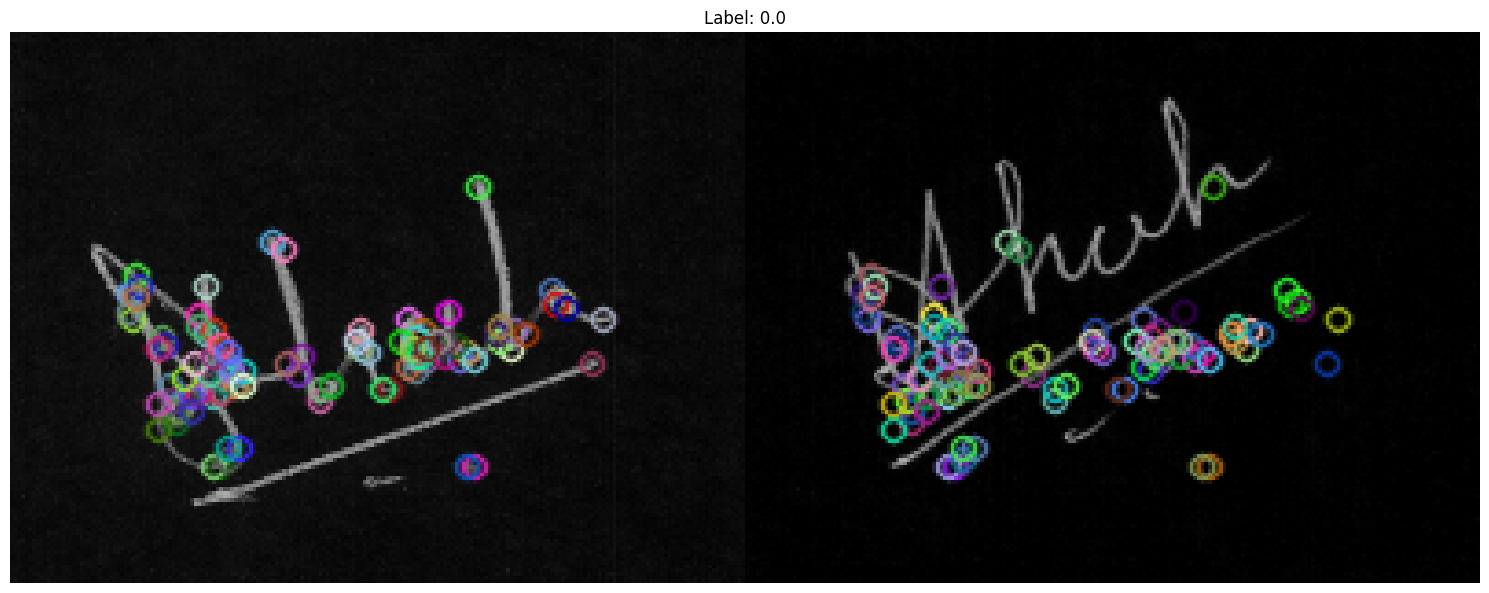

In [84]:
visualize_kp(X_train[:-1], y_train[:-1], kp_dict_train, to_show = 1, num_col = 1)

Index to show: 7561


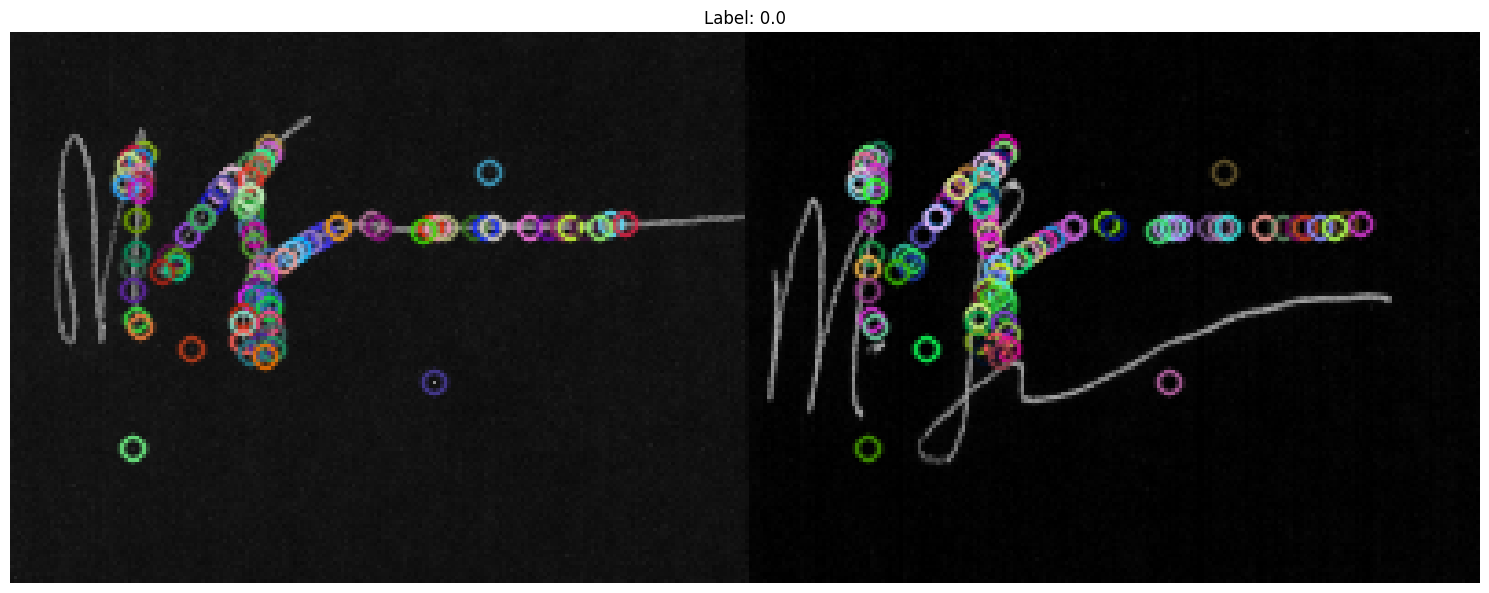

In [85]:
visualize_kp(X_test[:-1], y_test[:-1], kp_dict_test, to_show = 1, num_col = 1)

In [89]:
distances_train_reshape = distances_train.reshape(-1, 1)
print(distances_train_reshape.shape)
distances_test_reshape = distances_test.reshape(-1, 1)
print(distances_test_reshape.shape)

(21252, 1)
(9108, 1)


In [ ]:
svm = SVC(kernel = "linear")
svm.fit(distances_train_reshape, y_train)

In [ ]:
y_pred = svm.predict(distances_test_reshape)

In [ ]:
print("Metrics\n" + classification_report(y_val, y_pred_val))